<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#业务场景" data-toc-modified-id="业务场景-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>业务场景</a></span></li><li><span><a href="#数据获取" data-toc-modified-id="数据获取-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>数据获取</a></span></li><li><span><a href="#数据探索" data-toc-modified-id="数据探索-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>数据探索</a></span><ul class="toc-item"><li><span><a href="#标签分布" data-toc-modified-id="标签分布-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>标签分布</a></span></li><li><span><a href="#缺失值" data-toc-modified-id="缺失值-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>缺失值</a></span></li><li><span><a href="#重复值" data-toc-modified-id="重复值-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>重复值</a></span></li><li><span><a href="#不合法值" data-toc-modified-id="不合法值-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>不合法值</a></span></li><li><span><a href="#其他字段查看" data-toc-modified-id="其他字段查看-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>其他字段查看</a></span></li></ul></li><li><span><a href="#数据预处理" data-toc-modified-id="数据预处理-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>数据预处理</a></span><ul class="toc-item"><li><span><a href="#无用特征筛选" data-toc-modified-id="无用特征筛选-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>无用特征筛选</a></span></li><li><span><a href="#规则清洗" data-toc-modified-id="规则清洗-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>规则清洗</a></span></li><li><span><a href="#特征构造" data-toc-modified-id="特征构造-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>特征构造</a></span></li></ul></li><li><span><a href="#训练集评估集拆分" data-toc-modified-id="训练集评估集拆分-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>训练集评估集拆分</a></span></li><li><span><a href="#模型训练" data-toc-modified-id="模型训练-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>模型训练</a></span><ul class="toc-item"><li><span><a href="#模型选择" data-toc-modified-id="模型选择-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>模型选择</a></span></li><li><span><a href="#模型评估" data-toc-modified-id="模型评估-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>模型评估</a></span></li><li><span><a href="#参数调整" data-toc-modified-id="参数调整-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>参数调整</a></span></li></ul></li><li><span><a href="#预测" data-toc-modified-id="预测-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>预测</a></span></li></ul></div>

# 业务场景

广告欺诈是数字营销需要面临的重要挑战之一，点击会欺诈浪费广告主大量金钱，同时对点击数据会产生误导作用。本次比赛提供了约50万次点击数据。特别注意：我们对数据进行了模拟生成，对某些特征含义进行了隐藏，并进行了脱敏处理。

字段|	类型|	说明|
-- | -- | --
sid|	string|	样本id|/请求会话sid
package|	string|	媒体信息|，包名（已加密）
version|	string|	媒体信息|，app版本
android_id|	string|	媒体信息|，对外广告位ID（已加密）
media_id|	string|	媒体信息|，对外媒体ID（已加密）
apptype|	int|	媒体信息|，app所属分类
timestamp|	bigint|	请求到达服务时间|，单位ms
location|	int|	用户地理位置编码|（精确到城市）
fea_hash|	int|	用户特征编码|（具体物理含义略去）
fea1_hash|	int|	用户特征编码|（具体物理含义略去）
cus_type|	int|	用户特征编码|（具体物理含义略去）
ntt|	int|	网络类型| 0-未知, 1-有线网, 2-WIFI, 3-蜂窝网络未知, 4-2G, 5-3G, 6–4G
carrier|	string|	设备使用的运营商| 0-未知, 46000-移动, 46001-联通, 46003-电信
os|	string|	操作系统|，默认为android
osv|	string|	操作系统版本|
lan|	string|	设备采用的语言|，默认为中文
dev_height|	int|	设备高|
dev_width|	int|	设备宽|
dev_ppi|	int|	屏幕分辨率|

# 数据获取

In [210]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
df_data_train_original = pd.read_csv('./train.csv')
df_data_train_original.head(10)

,Unnamed: 0,android_id,apptype,carrier,dev_height,dev_ppi,dev_width,label,lan,media_id,...,os,osv,package,sid,timestamp,version,fea_hash,location,fea1_hash,cus_type
0,0,316361,1199,46000.0,0.0,0.0,0.0,1,NaN,104,...,android,9,18,1438873,1.559893e+12,8,2135019403,0,2329670524,601
1,1,135939,893,0.0,0.0,0.0,0.0,1,NaN,19,...,android,8.1,0,1185582,1.559994e+12,4,2782306428,1,2864801071,1000
2,2,399254,821,0.0,760.0,0.0,360.0,1,NaN,559,...,android,8.1.0,0,1555716,1.559837e+12,0,1392806005,2,628911675,696
3,3,68983,1004,46000.0,2214.0,0.0,1080.0,0,NaN,129,...,android,8.1.0,0,1093419,1.560042e+12,0,3562553457,3,1283809327,753
4,4,288999,1076,46000.0,2280.0,0.0,1080.0,1,zh-CN,64,...,android,8.0.0,0,1400089,1.559867e+12,5,2364522023,4,1510695983,582
5,5,184658,788,46000.0,2196.0,480.0,1080.0,1,zh-CN,194,...,Android,8.1.0,35,1253737,1.559976e+12,5,1655793887,5,1080320295,430
6,6,0,1106,46000.0,0.0,0.0,0.0,0,NaN,39,...,android,9,123,1387136,1.559845e+12,0,369486452,6,4190764663,411
7,7,0,1001,46000.0,760.0,0.0,360.0,1,zh-CN,29,...,Android,8.1.0,4,1597216,1.559783e+12,0,3912031003,7,2627690535,411
8,8,646994,893,0.0,0.0,0.0,0.0,0,NaN,19,...,android,8.1,0,1910989,1.559549e+12,4,3307888762,8,2961728815,886
9,9,0,1001,46000.0,760.0,0.0,360.0,1,zh-CN,29,...,Android,8.1.0,4,1785622,1.559646e+12,0,1485855711,9,2678022183,411


In [3]:
df_data_train_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  500000 non-null  int64  
 1   android_id  500000 non-null  int64  
 2   apptype     500000 non-null  int64  
 3   carrier     500000 non-null  float64
 4   dev_height  500000 non-null  float64
 5   dev_ppi     500000 non-null  float64
 6   dev_width   500000 non-null  float64
 7   label       500000 non-null  int64  
 8   lan         316720 non-null  object 
 9   media_id    500000 non-null  int64  
 10  ntt         500000 non-null  float64
 11  os          500000 non-null  object 
 12  osv         493439 non-null  object 
 13  package     500000 non-null  int64  
 14  sid         500000 non-null  int64  
 15  timestamp   500000 non-null  float64
 16  version     500000 non-null  object 
 17  fea_hash    500000 non-null  object 
 18  location    500000 non-null  int64  
 19  fe

In [4]:
df_data_test_original = pd.read_csv('./test1.csv')
df_data_test_original.head()

,Unnamed: 0,android_id,apptype,carrier,dev_height,dev_ppi,dev_width,lan,media_id,ntt,os,osv,package,sid,timestamp,version,fea_hash,location,fea1_hash,cus_type
0,0,317625,1181,46000.0,2196.0,2.0,1080.0,CN,639,2.0,Android,8.1.0,188,1440682,1.559872e+12,7,1672223856,57,3872258917,658
1,1,435108,944,46003.0,2280.0,3.0,1080.0,zh-CN,704,6.0,Android,8.1.0,221,1606824,1.559739e+12,3,3767901757,23,129322164,943
2,2,0,1106,46000.0,0.0,0.0,0.0,NaN,39,2.0,android,5.1,1562,1774642,1.559614e+12,0,454638703,30,4226678391,411
3,3,451504,761,46000.0,1344.0,0.0,720.0,NaN,54,2.0,android,7.1.1,9,1742535,1.559668e+12,0,1507622951,65,3355419572,848
4,4,0,1001,46000.0,665.0,0.0,320.0,zh-CN,29,5.0,Android,8.1.0,4,1689686,1.559694e+12,0,4116351093,148,2644467751,411


In [5]:
df_data_test_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  150000 non-null  int64  
 1   android_id  150000 non-null  int64  
 2   apptype     150000 non-null  int64  
 3   carrier     150000 non-null  float64
 4   dev_height  150000 non-null  float64
 5   dev_ppi     150000 non-null  float64
 6   dev_width   150000 non-null  float64
 7   lan         94453 non-null   object 
 8   media_id    150000 non-null  int64  
 9   ntt         150000 non-null  float64
 10  os          150000 non-null  object 
 11  osv         148008 non-null  object 
 12  package     150000 non-null  int64  
 13  sid         150000 non-null  int64  
 14  timestamp   150000 non-null  float64
 15  version     150000 non-null  object 
 16  fea_hash    150000 non-null  object 
 17  location    150000 non-null  int64  
 18  fea1_hash   150000 non-null  int64  
 19  cu

# 数据探索

## 标签分布

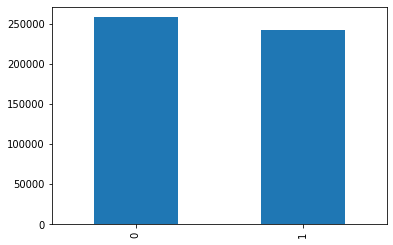

In [6]:
df_data_train_original['label'].value_counts().plot.bar()
plt.show()

## 缺失值

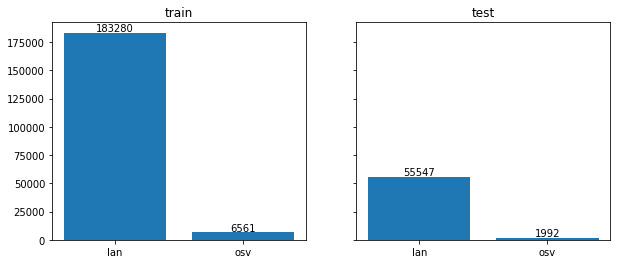

In [7]:
fg, ax = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)

train_data = df_data_train_original.isnull().sum()[df_data_train_original.isnull().sum() > 0]
ax[0].bar(train_data.index, train_data.values)
ax[0].set_title('train')
for idx, value in enumerate(train_data):
    ax[0].text(idx, value+1000, value, ha='center')

test_data = df_data_test_original.isnull().sum()[df_data_test_original.isnull().sum() > 0]
ax[1].bar(test_data.index,test_data.values)
ax[1].set_title('test')
for idx, value in enumerate(test_data):
    ax[1].text(idx, value+1500, value, ha='center')
plt.show()

In [8]:
# 用 unknow 代替缺失值
df_data_train_original['lan'] = df_data_train_original['lan'].fillna('unknow')
df_data_train_original['osv'] = df_data_train_original['osv'].fillna('unknow')
df_data_test_original['lan'] = df_data_test_original['lan'].fillna('unknow')
df_data_test_original['osv'] = df_data_test_original['osv'].fillna('unknow')

## 重复值

In [9]:
df_data_train_original[df_data_train_original.duplicated()]

,Unnamed: 0,android_id,apptype,carrier,dev_height,dev_ppi,dev_width,label,lan,media_id,...,os,osv,package,sid,timestamp,version,fea_hash,location,fea1_hash,cus_type


In [10]:
df_data_test_original[df_data_test_original.duplicated()]

,Unnamed: 0,android_id,apptype,carrier,dev_height,dev_ppi,dev_width,lan,media_id,ntt,os,osv,package,sid,timestamp,version,fea_hash,location,fea1_hash,cus_type


## 不合法值

In [11]:
df_data_train_original.select_dtypes(include='object')

,lan,os,osv,version,fea_hash
0,unknow,android,9,8,2135019403
1,unknow,android,8.1,4,2782306428
2,unknow,android,8.1.0,0,1392806005
3,unknow,android,8.1.0,0,3562553457
4,zh-CN,android,8.0.0,5,2364522023
...,...,...,...,...,...
499995,zh-CN,Android,7.1.2,7,861755946
499996,unknow,android,8.1.0,3,1714444511
499997,unknow,android,6.0.1,0,3843262581
499998,zh_CN,android,5.1.1,0,1984296118


In [12]:
df_data_test_original.select_dtypes(include='object')

,lan,os,osv,version,fea_hash
0,CN,Android,8.1.0,7,1672223856
1,zh-CN,Android,8.1.0,3,3767901757
2,unknow,android,5.1,0,454638703
3,unknow,android,7.1.1,0,1507622951
4,zh-CN,Android,8.1.0,0,4116351093
...,...,...,...,...,...
149995,zh-CN,Android,8.1.0,0,3162887451
149996,zh-CN,Android,9.0.0,0,97238959
149997,zh-CN,Android,8.1.0,0,1320118495
149998,zh-CN,android,4.4.2,2,1292986591


## 其他字段查看

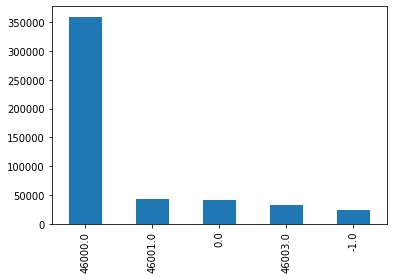

In [13]:
df_data_train_original['carrier'].value_counts().plot.bar()
plt.show()

In [14]:
df_data_train_original['os'].value_counts()

android    303175
Android    196825
Name: os, dtype: int64

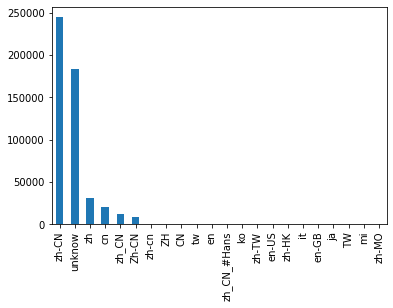

In [15]:
df_data_train_original['lan'].value_counts().plot.bar()
plt.show()

In [16]:
df_data_train_original['version'].value_counts()

0            292156
5             56691
8             38348
4             24262
3             23857
7             22801
2             12750
1              9184
11             8867
6              8527
V3              806
9               765
v1              611
10              126
P_Final_6        92
V6               88
GA3              35
GA2              10
15                9
V2                8
 2                6
50                1
Name: version, dtype: int64

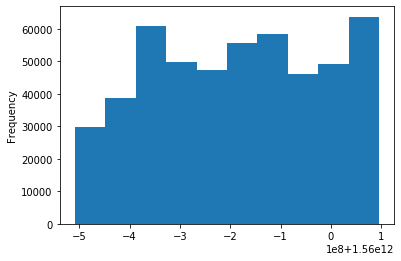

In [17]:
df_data_train_original['timestamp'].plot.hist()
plt.show()

In [94]:
df_data_train_original['location'].value_counts().values

array([14932, 12655, 11647,  9472,  8941,  8627,  8315,  8285,  7817,
        7624,  7622,  7324,  7099,  7035,  6077,  6054,  6004,  5710,
        5634,  5598,  5527,  5501,  5245,  5225,  4595,  4521,  4392,
        4144,  3779,  3776,  3615,  3360,  3353,  3314,  3129,  3025,
        2981,  2948,  2885,  2802,  2724,  2692,  2612,  2556,  2542,
        2539,  2496,  2456,  2380,  2355,  2354,  2338,  2336,  2303,
        2203,  2147,  2120,  2103,  2059,  2021,  2011,  1995,  1963,
        1943,  1928,  1918,  1912,  1907,  1886,  1865,  1861,  1807,
        1787,  1771,  1758,  1755,  1741,  1734,  1708,  1659,  1626,
        1612,  1602,  1573,  1549,  1536,  1535,  1524,  1504,  1487,
        1474,  1458,  1449,  1441,  1441,  1424,  1415,  1395,  1394,
        1335,  1328,  1294,  1284,  1282,  1277,  1274,  1257,  1243,
        1239,  1237,  1233,  1211,  1206,  1202,  1190,  1179,  1170,
        1167,  1159,  1144,  1126,  1125,  1124,  1122,  1120,  1098,
        1092,  1091,

In [129]:
df_data_train_original['fea_hash']

0         2135019403
1         2782306428
2         1392806005
3         3562553457
4         2364522023
             ...    
499995     861755946
499996    1714444511
499997    3843262581
499998    1984296118
499999    1697301943
Name: fea_hash, Length: 500000, dtype: object

In [148]:
df_data_train_original['fea_hash'].value_counts()

68083895      110
235856055      99
51306679       91
2815114810     77
16777343       60
             ... 
3069314679      1
1907027580      1
1227606199      1
4160082359      1
1211327780      1
Name: fea_hash, Length: 402980, dtype: int64

In [117]:
len(df_data_train_original['cus_type'].value_counts())

58

In [98]:
df_data_train_original['package'].value_counts()

0       131906
4        90513
9        37005
18       22367
14       22139
         ...  
1947         1
412          1
568          1
669          1
2047         1
Name: package, Length: 1950, dtype: int64

In [24]:
df_data_train_original['carrier'].value_counts()

 46000.0    359409
 46001.0     43390
 0.0         40652
 46003.0     32294
-1.0         24255
Name: carrier, dtype: int64

In [25]:
df_data_train_original['ntt'].value_counts()

2.0    318597
6.0    116548
5.0     35021
0.0     20617
3.0      4463
4.0      4446
7.0       306
1.0         2
Name: ntt, dtype: int64

In [42]:
len(df_data_train_original['apptype'].value_counts())

89

In [55]:
df_data_train_original['android_id'].value_counts()

0         126686
1190         209
6964          90
16662         30
2604          29
           ...  
377128         1
492889         1
499034         1
496987         1
311272         1
Name: android_id, Length: 362258, dtype: int64

In [79]:
df_data_train_original['media_id'].value_counts()

29      93978
64      40175
54      37005
39      36466
104     22317
        ...  
1499        1
1434        1
989         1
1429        1
1374        1
Name: media_id, Length: 284, dtype: int64

In [206]:
df_data_train_original['osv'].value_counts()

8.1.0            151419
9                 71332
6.0.1             31714
7.1.1             26503
9.0.0             24385
                  ...  
2.9.2                 1
2.3.7                 1
9.1                   1
Android_4.2.1         1
Android_4.4.3         1
Name: osv, Length: 155, dtype: int64

In [246]:
df_data_train_original['version'].value_counts().index[df_data_train_original['version'].value_counts()<8000]

Index(['V3', '9', 'v1', '10', 'P_Final_6', 'V6', 'GA3', 'GA2', '15', 'V2',
       ' 2', '50'],
      dtype='object')

In [265]:
df_data_train_original['dev_ppi'].value_counts()

0.0      383291
480.0     58775
3.0       23543
2.0       12891
320.0      8498
          ...  
369.0         1
384.0         1
192.0         1
333.0         1
60.0          1
Name: dev_ppi, Length: 92, dtype: int64

# 数据预处理

## 无用特征筛选

In [400]:
df_data_train_original['type_set'] = 'train'
df_data_test_original['type_set'] = 'test'
# useless_col = ['package','location']
useless_col = useless_col + ['android_id', 'media_id', 'label', 'Unnamed: 0','sid',]
features = [x for x in df_data_train_original.columns if x not in useless_col]
df_all = pd.concat([df_data_train_original[features], df_data_test_original[features]], axis=0)
df_train_deal = df_data_train_original[features].copy()
df_test_deal = df_data_test_original[features].copy()

## 规则清洗

In [401]:
# 设备采用的语言字段
def deal_lan(x):
    if x in ['zh-CN','zh', 'cn', 'zh_CN', 'Zh-CN', 'zh-cn', 'ZH','CN', 'zh_CN_#Hans', 'zh-TW', 'zh-HK', 'zh-MO']:
        return 'zh'
    elif x == 'unknow':
        return x 
    else:
        return 'other'

df_train_deal['lan'] = df_train_deal['lan'].apply(deal_lan)

In [421]:
df_all['lan'] = df_all['lan'].apply(deal_lan)

In [423]:
df_all['lan'].value_counts()

zh        410875
unknow    238827
other        298
Name: lan, dtype: int64

In [404]:
# 处理系统版本
def deal_osv(x):
    result = re.sub('Android_?','',x)
    result = result.strip()
    if re.findall('^[0-9]{1}\.?', result):
        return result[0]
    else:
        return 'u'

df_train_deal['osv'] = df_train_deal['osv'].apply(deal_osv)

In [422]:
df_all['osv'] = df_all['osv'].apply(deal_osv)

In [424]:
df_all['osv'].value_counts()

8    258952
9    136210
7     84218
6     75359
5     59457
4     21675
u      8556
3      3601
2      1967
1         5
Name: osv, dtype: int64

In [406]:
# 设备使用营运商类型字段
df_train_deal['carrier'] = df_train_deal['carrier'].apply(lambda x: 0.0 if x == -1.0 else x)

In [425]:
df_all['carrier'] = df_all['carrier'].apply(lambda x: 0.0 if x == -1.0 else x)
df_all['carrier'].value_counts()

46000.0    467100
0.0         84426
46001.0     56473
46003.0     42001
Name: carrier, dtype: int64

In [408]:
# version app版本字段
save_list = df_train_deal['version'].value_counts().index[df_train_deal['version'].value_counts()>8000]
df_train_deal['version'] = df_train_deal['version'].apply(lambda x: 'other' if x not in save_list else x)

In [428]:
df_all['version'] = df_all['version'].apply(lambda x: 'other' if x not in save_list else x)
df_all['version'].value_counts()

0        380269
5         73459
8         49758
4         31535
3         31017
7         29632
2         16483
1         11906
11        11578
6         10990
other      3373
Name: version, dtype: int64

In [410]:
# fea_hash用户特征
mode_value = df_train_deal['fea_hash'].mode()[0]
def is_ok(x):
    if re.findall('[A-Za-z]', x):
        return int(mode_value)
    else:
        return int(x)
df_train_deal['fea_hash'] = df_train_deal['fea_hash'].apply(is_ok)

In [429]:
df_all['fea_hash'] = df_all['fea_hash'].apply(is_ok)
df_all['fea_hash'].value_counts()

68083895      257
235856055     128
51306679      127
2815114810     91
16777343       88
             ... 
3451592047      1
3209598581      1
2121632467      1
2196066353      1
3507824496      1
Name: fea_hash, Length: 509360, dtype: int64

In [388]:
# # 处理fea_hash
# df_train_deal['fea_hash'] = df_train_deal['fea_hash'].apply(
#     lambda x: x if isinstance(x, int) else df_train_deal['fea_hash'].mode())

In [389]:
# # 标准化字段
# ss = StandardScaler()
# df_train_deal['timestamp'] = ss.fit_transform(df_train_deal['timestamp'].values.reshape(-1,1))

# ss = StandardScaler()
# df_train_deal['fea1_hash'] = ss.fit_transform(df_train_deal['fea1_hash'].values.reshape(-1,1))

# ss = StandardScaler()
# df_train_deal['cus_type'] = ss.fit_transform(df_train_deal['cus_type'].values.reshape(-1,1))

In [390]:
df_train_deal.head()

,apptype,carrier,dev_height,dev_ppi,dev_width,lan,ntt,os,osv,timestamp,version,fea_hash,fea1_hash,cus_type,type_set
0,1199,46000.0,0.0,0.0,0.0,unknow,6.0,android,9,1.559893e+12,8,2135019403,2329670524,601,train
1,893,0.0,0.0,0.0,0.0,unknow,6.0,android,8,1.559994e+12,4,2782306428,2864801071,1000,train
2,821,0.0,760.0,0.0,360.0,unknow,0.0,android,8,1.559837e+12,0,1392806005,628911675,696,train
3,1004,46000.0,2214.0,0.0,1080.0,unknow,2.0,android,8,1.560042e+12,0,3562553457,1283809327,753,train
4,1076,46000.0,2280.0,0.0,1080.0,zh,2.0,android,8,1.559867e+12,5,2364522023,1510695983,582,train


In [430]:
df_all.head()

,apptype,carrier,dev_height,dev_ppi,dev_width,lan,ntt,os,osv,timestamp,version,fea_hash,fea1_hash,cus_type,type_set
0,1199,46000.0,0.0,0.0,0.0,unknow,6.0,android,9,1.559893e+12,8,2135019403,2329670524,601,train
1,893,0.0,0.0,0.0,0.0,unknow,6.0,android,8,1.559994e+12,4,2782306428,2864801071,1000,train
2,821,0.0,760.0,0.0,360.0,unknow,0.0,android,8,1.559837e+12,0,1392806005,628911675,696,train
3,1004,46000.0,2214.0,0.0,1080.0,unknow,2.0,android,8,1.560042e+12,0,3562553457,1283809327,753,train
4,1076,46000.0,2280.0,0.0,1080.0,zh,2.0,android,8,1.559867e+12,5,2364522023,1510695983,582,train


## 特征构造

In [412]:
# 独热编码处理
one_hot_columns = ['lan', 'carrier', 'ntt', 'apptype', 'os', 'osv', 'version']

for column in one_hot_columns:
    df_dum = pd.get_dummies(df_train_deal[column], prefix=column)
    df_train_deal = pd.concat([df_train_deal, df_dum], axis=1)
    df_train_deal = df_train_deal.drop(column, axis=1)

In [431]:
one_hot_columns = ['lan', 'carrier', 'ntt', 'apptype', 'os', 'osv', 'version']
for column in one_hot_columns:
    df_dum = pd.get_dummies(df_all[column], prefix=column)
    df_all = pd.concat([df_all, df_dum], axis=1)
    df_all = df_all.drop(column, axis=1)

In [432]:
df_all.head()

,dev_height,dev_ppi,dev_width,timestamp,fea_hash,fea1_hash,cus_type,type_set,lan_other,lan_unknow,...,version_1,version_11,version_2,version_3,version_4,version_5,version_6,version_7,version_8,version_other
0,0.0,0.0,0.0,1.559893e+12,2135019403,2329670524,601,train,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0.0,0.0,0.0,1.559994e+12,2782306428,2864801071,1000,train,0,1,...,0,0,0,0,1,0,0,0,0,0
2,760.0,0.0,360.0,1.559837e+12,1392806005,628911675,696,train,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2214.0,0.0,1080.0,1.560042e+12,3562553457,1283809327,753,train,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2280.0,0.0,1080.0,1.559867e+12,2364522023,1510695983,582,train,0,0,...,0,0,0,0,0,1,0,0,0,0


In [392]:
# # 屏幕宽、高、dpi整合
# df_train_deal['new_dpi'] = df_train_deal['dev_height'] * df_train_deal['dev_width'] / (df_train_deal['dev_ppi'] + 1)
# df_train_deal = df_train_deal.drop(columns=['dev_height', 'dev_width', 'dev_ppi'], axis=1)

In [393]:
df_train_deal.head()

,dev_height,dev_ppi,dev_width,timestamp,fea_hash,fea1_hash,cus_type,type_set,lan_other,lan_unknow,...,version_1,version_11,version_2,version_3,version_4,version_5,version_6,version_7,version_8,version_other
0,0.0,0.0,0.0,1.559893e+12,2135019403,2329670524,601,train,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0.0,0.0,0.0,1.559994e+12,2782306428,2864801071,1000,train,0,1,...,0,0,0,0,1,0,0,0,0,0
2,760.0,0.0,360.0,1.559837e+12,1392806005,628911675,696,train,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2214.0,0.0,1080.0,1.560042e+12,3562553457,1283809327,753,train,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2280.0,0.0,1080.0,1.559867e+12,2364522023,1510695983,582,train,0,0,...,0,0,0,0,0,1,0,0,0,0


# 训练集评估集拆分

In [442]:
df_train_features = df_all[df_all['type_set'] == 'train']
df_train_features = df_train_features.drop('type_set', axis=1)

df_test_features = df_all[df_all['type_set'] == 'test']
df_test_features = df_test_features.drop('type_set', axis=1)

df_train_labels = df_data_train_original['label']

In [395]:
df_train_ready = df_train_deal.drop('type_set', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_train_ready, df_data_train_original['label'], random_state=123)
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_train, y_train, random_state=123)

# 模型训练

In [398]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.875136

0.83384

## 模型选择

In [397]:
models = {
#     'tree': DecisionTreeClassifier(), 
#     'bnb': BernoulliNB(), 
#     'knn': KNeighborsClassifier(), 
#     'log': LogisticRegression(),
    'ada': AdaBoostClassifier(),
    'rad': RandomForestClassifier()
}

df_result = pd.DataFrame(index=['accuracy', 'precision', 'recall','f1'], columns=list(models.keys()))

for model in models:
    clf = models[model]
    acc = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5).mean()
#     pre = cross_val_score(clf, X_train, y_train, scoring='precision', cv=5).mean()
#     rec = cross_val_score(clf, X_train, y_train, scoring='recall', cv=5).mean()
#     f1 = cross_val_score(clf, X_train, y_train, scoring='f1', cv=5).mean()
#     df_result[model] = np.round(np.array([acc, pre, rec, f1]), 2)
    df_result[model] = np.round(np.array([acc, 0, 0, 0]), 2)
    print('{} finished'.format(model), end='...')

df_result

ada finished...rad finished...

,ada,rad
accuracy,0.83,0.88
precision,0.00,0.00
recall,0.00,0.00
f1,0.00,0.00


## 模型评估

... ... ... ... ... ... 

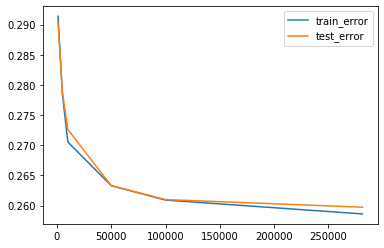

In [39]:
size_list = []
train_error_list = []
test_error_list = []
x_ = [1000, 5000, 10000, 50000, 100000, 281250]
for size in x_:
    clf = RandomForestClassifier()
    clf.fit(X_train_subset[:size], y_train_subset[:size])
    train_predict = clf.predict(X_test_subset)
    train_error = 1 - accuracy_score(y_test_subset, train_predict)
    test_predict = clf.predict(X_test)
    test_error = 1 - accuracy_score(y_test, test_predict)
    size_list.append(size)
    train_error_list.append(train_error)
    test_error_list.append(test_error)
    print('...', end=' ')

plt.plot(x_, train_error_list, label='train_error')
plt.plot(x_, test_error_list, label='test_error')
plt.legend()
plt.show()

## 参数调整

In [399]:
clf = RandomForestClassifier()
Parameters = {
    'n_estimators': [100, 200,300],
    'criterion': ['entropy', 'gini'],
}
grs = GridSearchCV(clf, Parameters)
grs.fit(X_train, y_train)
clf.best_params_

KeyboardInterrupt: 

# 预测

In [443]:
clf = RandomForestClassifier()
clf.fit(df_train_features, df_train_labels)
predict = clf.predict(df_test_features)
predict

array([0, 1, 0, ..., 1, 1, 1])

In [445]:
df_data_test_original['label'] = predict
df_result = df_data_test_original[['sid', 'label']]
df_result.to_csv('./predict.csv', index=False)